In [78]:
import pickle
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.options.mode.chained_assignment = None
sns.set(style="darkgrid", color_codes=True)
%matplotlib inline

In [83]:
with open("TEST_movie_data.pkl", 'r') as picklefile:
     all_movies = pickle.load(picklefile)

In [94]:
with open("director_movie_data.pkl", 'r') as picklefile:
     all_dir = pickle.load(picklefile)
dir_df = pd.DataFrame(all_dir)
dir_df.head()

,director,lifetime_films,lifetime_gross
0,Steven Spielberg,27,4155901520
1,Michael Bay,11,2143487601
2,Peter Jackson,12,2134703921
3,Robert Zemeckis,16,2039446164
4,James Cameron,9,1974307733


In [95]:
df = pd.DataFrame(all_movies)
df['production_budget'] = df['production_budget']*1000000
df['budget'] = 0
df['budget'][df['imdb_budget'] != 0]  = df['imdb_budget']
df['budget'][df['imdb_budget'] == 0]  = df['production_budget']
df['month'] = df['release_date'].map(lambda x: x.month)
df['roi'] = df['worldwide_gross']/df['budget']
df['roi'] = df['roi'].where(df['roi']!=0, np.nan) 
df['worldwide_gross'] = df['worldwide_gross'].where(df['worldwide_gross']!=0, np.nan) 
df['foreign_gross'] = df['foreign_gross'].where(df['foreign_gross']!=0, np.nan) 
df['budget'] = df['budget'].where(df['budget']!=0, np.nan) 
df = df.sort(['domestic_gross'], ascending = False)
#df['genre'] = df['genre'].astype('category')
df = df[df.budget <= 270000000]
#df['dir_lifetime_gross'] = dir_df.lookup(dir_df.lifetime_gross)
df.head()

,director,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,month,roi
0,Joss Whedon,Buena Vista,623357910,896200000,Action / Adventure,220000000,220000000,PG-13,2012-05-04,142,Marvel's The Avengers,1519557910,220000000,5,6.907081
1,Christopher Nolan,Warner Bros.,448139099,636300000,Action Thriller,250000000,250000000,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,7,4.337756
665,Francis Lawrence,Lionsgate,424668047,440244916,Action / Adventure,130000000,130000000,PG-13,2013-11-22,146,The Hunger Games: Catching Fire,864912963,130000000,11,6.653177
666,Shane Black,Buena Vista,409013994,806426000,Action / Adventure,200000000,200000000,PG-13,2013-05-03,129,Iron Man 3,1215439994,200000000,5,6.077200
2,Gary Ross,Lionsgate,408010692,283237076,Action / Adventure,78000000,78000000,PG-13,2012-03-23,142,The Hunger Games,691247768,78000000,3,8.862151


In [96]:
#newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
new_df = df.merge(dir_df,on='director')
new_df.head()

,director,distributor,domestic_gross,foreign_gross,genre,imdb_budget,production_budget,rating,release_date,runtime,title,worldwide_gross,budget,month,roi,lifetime_films,lifetime_gross
0,Joss Whedon,Buena Vista,623357910,896200000,Action / Adventure,220000000,220000000,PG-13,2012-05-04,142,Marvel's The Avengers,1519557910,220000000,5,6.907081,4,1108509963
1,Christopher Nolan,Warner Bros.,448139099,636300000,Action Thriller,250000000,250000000,PG-13,2012-07-20,165,The Dark Knight Rises,1084439099,250000000,7,4.337756,9,1816484940
2,Christopher Nolan,Paramount,188020017,484700000,Sci-Fi Adventure,165000000,165000000,PG-13,2014-11-05,169,Interstellar,672720017,165000000,11,4.077091,9,1816484940
3,Francis Lawrence,Lionsgate,424668047,440244916,Action / Adventure,130000000,130000000,PG-13,2013-11-22,146,The Hunger Games: Catching Fire,864912963,130000000,11,6.653177,5,1152882837
4,Francis Lawrence,Lionsgate,337135885,414964344,Action / Adventure,125000000,125000000,PG-13,2014-11-21,123,The Hunger Games: Mockingjay - Part 1,752100229,125000000,11,6.016802,5,1152882837


###Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

###Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [73]:
y, X = dmatrices('worldwide_gross ~ budget + genre', data=df, return_type='dataframe')
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     20.09
Date:                Wed, 15 Jul 2015   Prob (F-statistic):           1.76e-87
Time:                        12:56:14   Log-Likelihood:                -10400.
No. Observations:                 518   AIC:                         2.090e+04
Df Residuals:                     467   BIC:                         2.112e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                   -1.747e+07   3.09e+07     -0.566      0.572     -7.81e+07  4.32e+07
genre[T.Action / Adventure]  1.131e+08   4.16e+07      2.717      0.007      3.13e+07  1.95e+08
genre[T.Action / Crime]     -5.512e+07   1.37e+08     -0.403      0.687     -3.24e+08  2.13e+08
genre[T.Action Comedy]       1.225e+07   4.83e+07      0.253      0.800     -8.27e+07  1.07e+08
genre[T.Action Drama]       -1.374e+08   5.79e+07     -2.371      0.018     -2.51e+08 -2.35e+07
genre[T.Action Horror]      -5.115e+07   5.79e+07     -0.883      0.378     -1.65e+08  6.27e+07
genre[T.Action Thriller]    -3.257e+07   4.58e+07     -0.712      0.477     -1.22e+08  5.74e+07
genre[T.Adventure]          -8.442e+07   6.21e+07     -1.359      0.175     -2.06e+08  3.76e+07
genre[T.Animation]           5.327e+07   3.58e+07      1.487      0.138     -1.71e+07  1.24e+08
genre[T.Comedy]              2.025e+07   3.37e+07      0.600      0.549     -4.61e+07  8.66e+07
genre[T.Comedy / Drama]      1.058e+07   4.14e+07      0.256      0.798     -7.08e+07  9.19e+07
genre[T.Comedy Thriller]       -0.0067      0.003     -1.995      0.047        -0.013    -0.000
genre[T.Concert]             5.206e+07   1.37e+08      0.380      0.704     -2.17e+08  3.21e+08
genre[T.Crime]              -4.635e+07   6.66e+07     -0.696      0.487     -1.77e+08  8.46e+07
genre[T.Crime Drama]        -5.177e+06   5.16e+07     -0.100      0.920     -1.07e+08  9.62e+07
genre[T.Crime Thriller]     -4.252e+07    7.3e+07     -0.583      0.560     -1.86e+08  1.01e+08
genre[T.Documentary]         1.207e+07    5.9e+07      0.204      0.838     -1.04e+08  1.28e+08
genre[T.Drama]               1.226e+07   3.35e+07      0.366      0.714     -5.35e+07   7.8e+07
genre[T.Drama / Thriller]    2.365e+07   8.26e+07      0.286      0.775     -1.39e+08  1.86e+08
genre[T.Family]             -1.462e+07   9.88e+07     -0.148      0.882     -2.09e+08   1.8e+08
genre[T.Family Adventure]   -9.041e+07   9.87e+07     -0.916      0.360     -2.84e+08  1.03e+08
genre[T.Family Comedy]      -3.165e+07   9.86e+07     -0.321      0.748     -2.25e+08  1.62e+08
genre[T.Fantasy]             2.002e+06   5.58e+07      0.036      0.971     -1.08e+08  1.12e+08
genre[T.Fantasy Comedy]         0.0915      0.083      1.098      0.273        -0.072     0.255
genre[T.Fantasy Drama]      -4.803e+07   9.87e+07     -0.487      0.627     -2.42e+08  1.46e+08
genre[T.Foreign]            -1.274e+07   3.82e+07     -0.333      0.739     -8.79e+07  6.24e+07
genre[T.Foreign / Action]   -5.065e+07   5.34e+07     -0.949      0.343     -1.56e+08  5.43e+07
genre[T.Foreign / Horror]       0.2454      0.227      1.081      0.280        -0.201     0.692
genre[T.Historical Drama]   -8.726e+07   8.22e+07     -1.062      0.289     -2.49e+08  7.43e+07
genre[T.Hor

In [38]:
X.head()

,Intercept,rating[T.NC-17],rating[T.PG],rating[T.PG-13],rating[T.R],rating[T.Unrated],budget
0,1,0,0,1,0,0,220000000
1,1,0,0,1,0,0,250000000
665,1,0,0,1,0,0,130000000
666,1,0,0,1,0,0,200000000
2,1,0,0,1,0,0,78000000


In [40]:
X_prime = np.linspace(X.min(), X.max(), 200)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before
y_hat = results.predict(X_prime)

ValueError: operands could not be broadcast together with shapes (7,) (200,) 

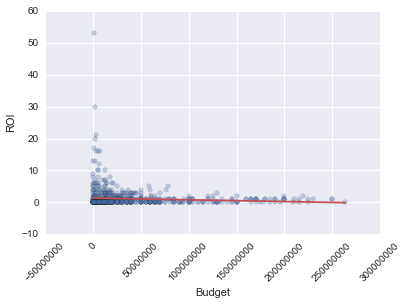

In [338]:
plt.scatter(X.budget, y, alpha=0.3)
plt.xlabel("Budget")
plt.ylabel("ROI")
plt.plot(X_prime[:, 1], y_hat, 'r')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.show()

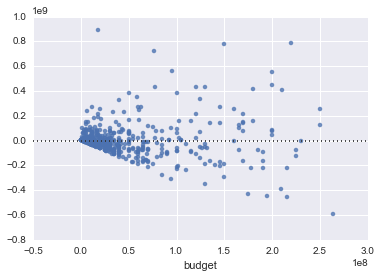

In [41]:
sns.residplot(X.budget,y)

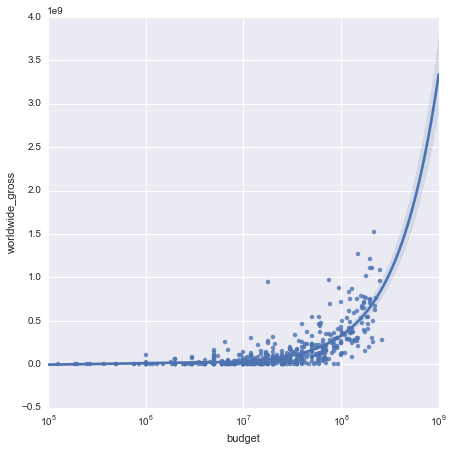

In [44]:
#sns.regplot(x="imdb_budget", y="domestic_gross", logx = True, data=df2 )

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.regplot(x="budget", y="worldwide_gross", data = df)
plt.show()

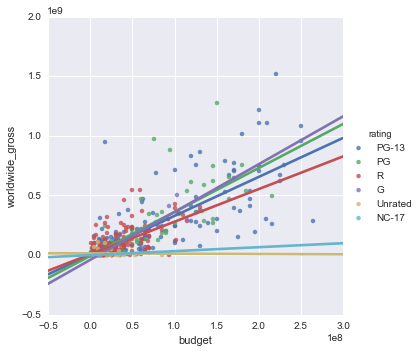

In [47]:
sns.lmplot(x="budget", y="worldwide_gross", hue="rating", ci = None, data=df);

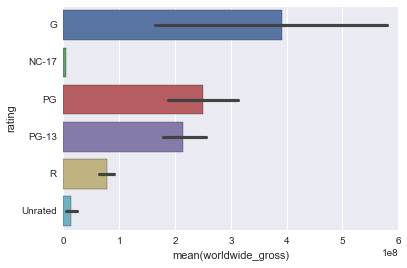

In [49]:
sns.barplot(x="worldwide_gross", y="rating", data=df.sort('rating'));

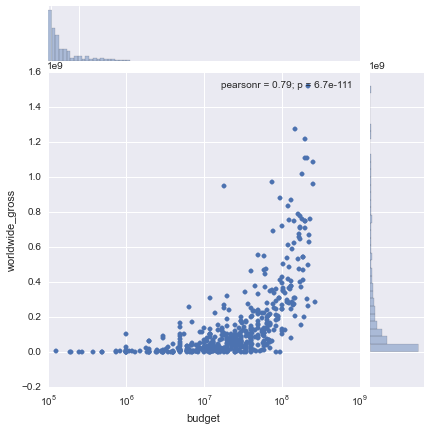

In [59]:
#sns.distplot(X.imdb_budget)
#sns.distplot(X.imdb_budget, kde=False, rug=True);
#sns.jointplot(x="budget", y="domestic_gross", data=df2);

g = sns.jointplot(x="budget", y="worldwide_gross", data=df);
#g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[0].set_xscale('log')
plt.show()

#sns.pairplot(df2);

###Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

###Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

###Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.